<a href="https://colab.research.google.com/github/Davianka/food-sales-predictions/blob/main/Project_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Davianka Lopez


1.   Sales Prediction Project
2.   07/1/2022



# Data 

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
set_config(display='diagram')
scaler = StandardScaler()
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg_pipe = make_pipeline(scaler, reg)
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [101]:
filename = '/content/drive/MyDrive/project 1/sales_predictions (1).csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [102]:
df.shape

(8523, 12)

In [103]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [104]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [105]:
df.duplicated().sum()

0

In [106]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [107]:
df['Outlet_Size'].fillna('Missing', inplace=True)
df['Outlet_Size'].value_counts()

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [108]:
 df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [109]:
df['Item_Fat_Content']= df['Item_Fat_Content'].replace('low fat','Low Fat'  )
df['Item_Fat_Content']=df['Item_Fat_Content'].replace( 'LF','Low Fat')
df['Item_Fat_Content']= df['Item_Fat_Content'].replace('reg','Regular' )
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [110]:
df[['Item_Identifier', 'Item_Weight', 'Item_Type']]

,Item_Identifier,Item_Weight,Item_Type
0,FDA15,9.300,Dairy
1,DRC01,5.920,Soft Drinks
2,FDN15,17.500,Meat
3,FDX07,19.200,Fruits and Vegetables
4,NCD19,8.930,Household
...,...,...,...
8518,FDF22,6.865,Snack Foods
8519,FDS36,8.380,Baking Goods
8520,NCJ29,10.600,Health and Hygiene
8521,FDN46,7.210,Snack Foods


In [111]:
mean_weight = df['Item_Weight'].mean()  
df['Item_Weight'].fillna(mean_weight, inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [112]:
df['Item_Weight'].mean() 
#checking mean, max, and minm of numerical columns

12.857645184135976

In [113]:
df['Item_Weight'].mode() 

0    12.857645
dtype: float64

In [114]:
df['Item_Weight'].min()

4.555

In [115]:
df['Item_Weight'].max()

21.35

In [116]:
df['Item_Visibility'].mean() #max(0.32839), min(0.0), mean(0.06613)

0.06613202877895108

In [117]:
df['Item_MRP'].mean() #max (266.8884), min(31.29), mean(140.99278)

140.9927819781767

In [118]:
df['Outlet_Establishment_Year'].mode() #max(2009), min(1985), mean(1997.8318667), mode(1985)

0    1985
dtype: int64

In [119]:
df['Item_Outlet_Sales'].mean() #max(3086.9648), Min(33.29), mean(2181.2889), mode(958.75)

2181.288913575032

# Data Visuals

The majority of the items on this dataframe have a visibility of 0.00-0.10


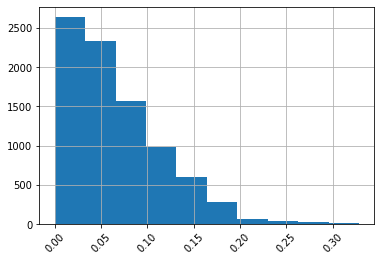

In [120]:
df['Item_Visibility'].hist()
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')          
print('The majority of the items on this dataframe have a visibility of 0.00-0.10')

the bulk of the stores on this DataFrame are from 1999 and older.


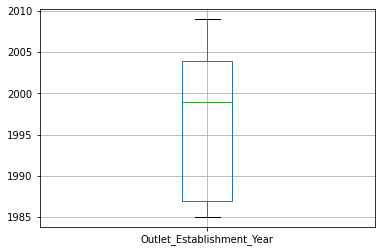

In [121]:
df.boxplot(column='Outlet_Establishment_Year');
print('the bulk of the stores on this DataFrame are from 1999 and older.')



1.   Was there any sales correlations?
2.   What were the top 3 item category sales?
3.   Did low fat or regular make a sales difference?





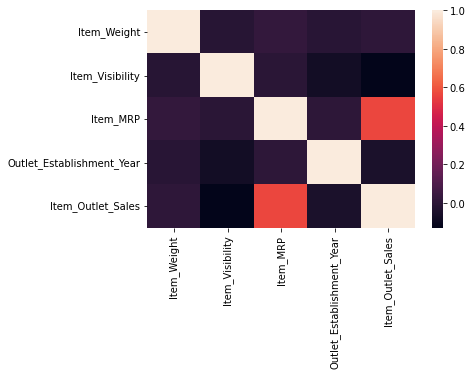

In [122]:
sns.heatmap(data = df.corr());

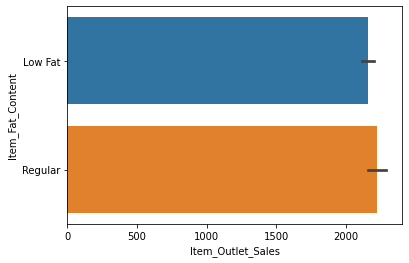

In [123]:
sns.barplot(data=df, y='Item_Fat_Content', x='Item_Outlet_Sales');

The top 3 item sales are starchy foods, snacks and seafood


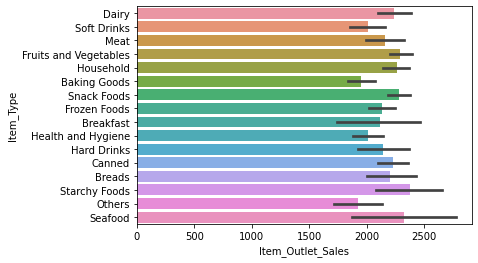

In [124]:
ax= sns.barplot(data=df, y='Item_Type', x='Item_Outlet_Sales');
print('The top 3 item sales are starchy foods, snacks and seafood')

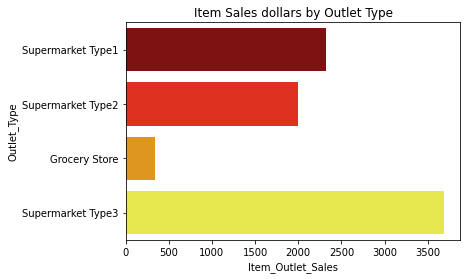

In [125]:
ax= sns.barplot(data=df, x = 'Item_Outlet_Sales', y= 'Outlet_Type', palette='hot', ci=None,)
figsize=(20,8)
ax.set_title('Item Sales dollars by Outlet Type');

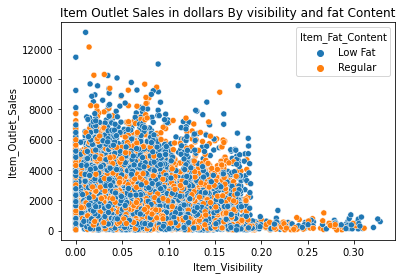

In [126]:
ax=sns.scatterplot(data=df, x="Item_Visibility", y="Item_Outlet_Sales", hue="Item_Fat_Content")
figsize=(20,8)
ax.set_title('Item Outlet Sales in dollars By visibility and fat Content');

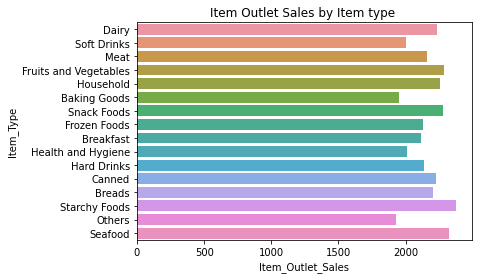

In [127]:
ax= sns.barplot(data=df, y='Item_Type', x='Item_Outlet_Sales',ci=None)
figsize=(20,8)
ax.set_title('Item Outlet Sales by Item type ');


# Machine learning prep

In [128]:
sales_predictions = '/content/drive/MyDrive/project 1/sales_predictions (1).csv'
df2=pd.read_csv(sales_predictions)
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [129]:
df2.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [130]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [131]:
df2['Item_Fat_Content']= df['Item_Fat_Content'].replace('low fat','Low Fat'  )
df2['Item_Fat_Content']=df['Item_Fat_Content'].replace( 'LF','Low Fat')
df2['Item_Fat_Content']= df['Item_Fat_Content'].replace('reg','Regular' )
df2['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [132]:
df2['Outlet_Location_Type'].replace({'Tier 1':0, 'Tier 2':1, 'Tier 3':2}, inplace=True)
df2['Outlet_Location_Type'].value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

In [133]:
df2['Outlet_Size'].replace({'Small':0, 'Medium':1, 'High':2}, inplace=True)
df2['Outlet_Size'].value_counts()

1.0    2793
0.0    2388
2.0     932
Name: Outlet_Size, dtype: int64

In [134]:
abs(df2.corr()['Item_Outlet_Sales'])

Item_Weight                  0.014123
Item_Visibility              0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year    0.049135
Outlet_Size                  0.129076
Outlet_Location_Type         0.089367
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [135]:
X= df2.drop(columns=['Item_Outlet_Sales', 'Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier' ])
y= df2 ['Item_Outlet_Sales']
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=42)

In [136]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [137]:
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [138]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [139]:
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [140]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa8353fc350>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa835a33d10>)])

In [141]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa8353fc350>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa835a33d10>)])

In [142]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [143]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 27)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

# Linear regression Model

In [144]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa8353fc350>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa835a33d10>)])

In [145]:
reg_pipe.fit(X_train_processed,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [146]:
predictions = reg_pipe.predict(X_test_processed)

In [147]:
prediction_df2 = X_test.copy()
prediction_df2['True_Item_Outlet_Sales'] = y_test
prediction_df2['Predicted_Item_Outlet_Sales'] = predictions
prediction_df2['Error'] = predictions - y_test
prediction_df2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,True_Item_Outlet_Sales,Predicted_Item_Outlet_Sales,Error
7503,14.300,Low Fat,0.026300,Frozen Foods,79.4302,2.0,2,Supermarket Type1,1743.0644,1349.81074,-393.25366
2957,7.930,Low Fat,0.071136,Health and Hygiene,42.7086,0.0,0,Supermarket Type1,356.8688,777.81074,420.94194
7031,14.500,Regular,0.041313,Canned,42.0454,1.0,0,Supermarket Type1,377.5086,833.93574,456.42714
1084,NaN,Regular,0.044767,Soft Drinks,173.7054,1.0,2,Supermarket Type3,5778.4782,4234.93574,-1543.54246
856,10.195,Regular,0.012456,Meat,197.5110,0.0,1,Supermarket Type1,2356.9320,3264.09199,907.15999


# Regression metrics

In [166]:
scaler= StandardScaler()
lin_reg = LinearRegression()

lin_reg_pipe=make_pipeline( scaler, lin_reg)

lin_reg_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [167]:
train_pred= lin_reg_pipe.predict(X_train_processed)
test_pred=lin_reg_pipe.predict(X_test_processed)

In [171]:
prediction_df = X_test.copy()
prediction_df['True Median Price'] = y_test
prediction_df['Predicted Median Price'] = predictions
prediction_df['Error'] = predictions - y_test
prediction_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,True Median Price,Predicted Median Price,Error
7503,14.300,Low Fat,0.026300,Frozen Foods,79.4302,2.0,2,Supermarket Type1,1743.0644,1349.81074,-393.25366
2957,7.930,Low Fat,0.071136,Health and Hygiene,42.7086,0.0,0,Supermarket Type1,356.8688,777.81074,420.94194
7031,14.500,Regular,0.041313,Canned,42.0454,1.0,0,Supermarket Type1,377.5086,833.93574,456.42714
1084,NaN,Regular,0.044767,Soft Drinks,173.7054,1.0,2,Supermarket Type3,5778.4782,4234.93574,-1543.54246
856,10.195,Regular,0.012456,Meat,197.5110,0.0,1,Supermarket Type1,2356.9320,3264.09199,907.15999


#Evaluate the performance of your model based on rmse.

In [168]:
train_RMSE = np.sqrt(np.mean(np.abs(train_pred - y_train)**2))
test_RMSE= np.sqrt(np.mean(np.abs(test_pred - y_test)**2))

print(f'Model Training RMSE: {train_RMSE}')
print(f'Model Testing RMSE:{test_RMSE }')

Model Training RMSE: 1140.3937844027882
Model Testing RMSE:1094.6137175360711




#  Evaluate the performance of your model based on r^2.



In [151]:
train_r2 = np.corrcoef (y_train, train_pred)[0][1]**2
test_r2= np.corrcoef (y_test, test_pred)[0][1]**2

print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2: {test_r2}')

Model Training R2: 0.5605622674707569
Model Testing R2: 0.5664763870738198


# Regression Tree Model

In [152]:
from sklearn.tree import DecisionTreeRegressor

In [153]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [154]:
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [155]:
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

In [156]:
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)



1.0
0.16079762448152746


In [157]:
# Looking at options for tuning this model
dec_tree.get_params()


{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [158]:
dec_tree.get_depth()

42

In [159]:
dec_tree.get_n_leaves()

6261

In [160]:
dec_tree_2 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
dec_tree_2.fit(X_train_processed, y_train)
train_2_score = dec_tree_2.score(X_train_processed, y_train)
test_2_score = dec_tree_2.score(X_test_processed, y_test)
print(train_2_score)
print(test_2_score)

0.43164096170474664
0.4337775044707167


In [161]:
# List of values to try for max_depth:
depths = list(range(2, 42)) # will try every value between 2 and 42
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train_processed, y_train)
    train_score = dec_tree.score(X_test_processed, y_test)
    test_score = dec_tree.score(X_test_processed, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score


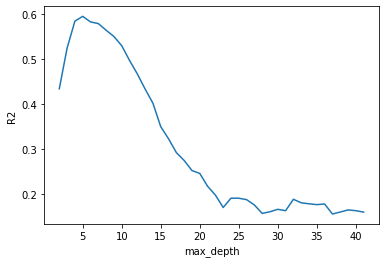

In [162]:
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [163]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
5,0.59471,0.59471
4,0.584005,0.584005
6,0.582356,0.582356
7,0.578571,0.578571
8,0.563884,0.563884


In [164]:
dec_tree_9 = DecisionTreeRegressor(max_depth = 6, random_state = 42)
dec_tree_9.fit(X_train_processed, y_train)
train_9_score = dec_tree_9.score(X_train_processed, y_train)
test_9_score = dec_tree_9.score(X_test_processed, y_test)
print(train_9_score)
print(test_9_score)

0.6150717341872132
0.5823564733012908
